# Explore here

In [ ]:
# Your code here
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
# modelado
from sklearn.model_selection import train_test_split
# escalado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# encoding

from sklearn.preprocessing import OneHotEncoder



# Import Data Set 

df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=927&path=AB_NYC_2019.csv')

# Mirar el data set las primeras 10 filas para ver mas o menos el contenido 

df.head(10)




,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [7]:
#ver tamano de la tabla 

df.shape

(48895, 16)

In [ ]:


# ver tipo de datos y valores no nulos 

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# Podemos ver que en este data set hay 48895 filas y 16 columnas entre 3 datos numericos con desimales y 7 datos numericos sin desimales asi como 6 categorias.

# La variable last_review debe tener 1052 valores nulos al igual que la variable reviews_per_month 

# Las demas valores se aprecian que no tienen valores nulos

# Tambien la variable hostd_id, host_name y name tienen valores nulos. 




In [ ]:
# 2. Preparacion y limpieza de Datos 

#  Contar filas  duplicadas. 

df.duplicated().sum 

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool>

In [ ]:
# El conteo es 0 por lo cual me esta diciendo que no hay filas duplicadas 

In [35]:
#Paso 2: Eliminar datos irrelevantes los cuales nuestro algoritmo no va a tomar patrones de ellos. 


df.drop(['id','name', 'host_id', 'host_name', 'last_review', 'reviews_per_month', 'neighbourhood'], axis= 1, inplace=True)




KeyError: "['id', 'name', 'host_id', 'host_name', 'last_review', 'reviews_per_month'] not found in axis"

In [36]:

df.head()
print(f"Luego de eliminar las columnas que son irrelevantes este es el tamano actual del df {df.head}")

Luego de eliminar las columnas que son irrelevantes este es el tamano actual del df <bound method NDFrame.head of       neighbourhood_group       neighbourhood  latitude  longitude  \
0                Brooklyn          Kensington  40.64749  -73.97237   
1               Manhattan             Midtown  40.75362  -73.98377   
2               Manhattan              Harlem  40.80902  -73.94190   
3                Brooklyn        Clinton Hill  40.68514  -73.95976   
4               Manhattan         East Harlem  40.79851  -73.94399   
...                   ...                 ...       ...        ...   
48890            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
48891            Brooklyn            Bushwick  40.70184  -73.93317   
48892           Manhattan              Harlem  40.81475  -73.94867   
48893           Manhattan      Hell's Kitchen  40.75751  -73.99112   
48894           Manhattan      Hell's Kitchen  40.76404  -73.98933   

             room_type  price  minimum_nights

In [34]:

# Contaremos los NaN por columna 

df.isnull().sum()
# No se aprecia ningun valor nulo , se entiende que al borrar en este caso los datos irrelevantes que tenian valores nulo se fueron con ellos jeje

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [33]:
# Paso 3 

# Analisis Univariante 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 3.7+ MB


In [ ]:
# -Análisis sobre variables categoricas 

df.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [ ]:
df.room_type.value_counts()
# Dentro de la variable tenemos 3 tipos de habitaciones las cuales tienen una cantidad de datos y la shared room tiene menos datos pero igualmente 
# no genera ningun problema 

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

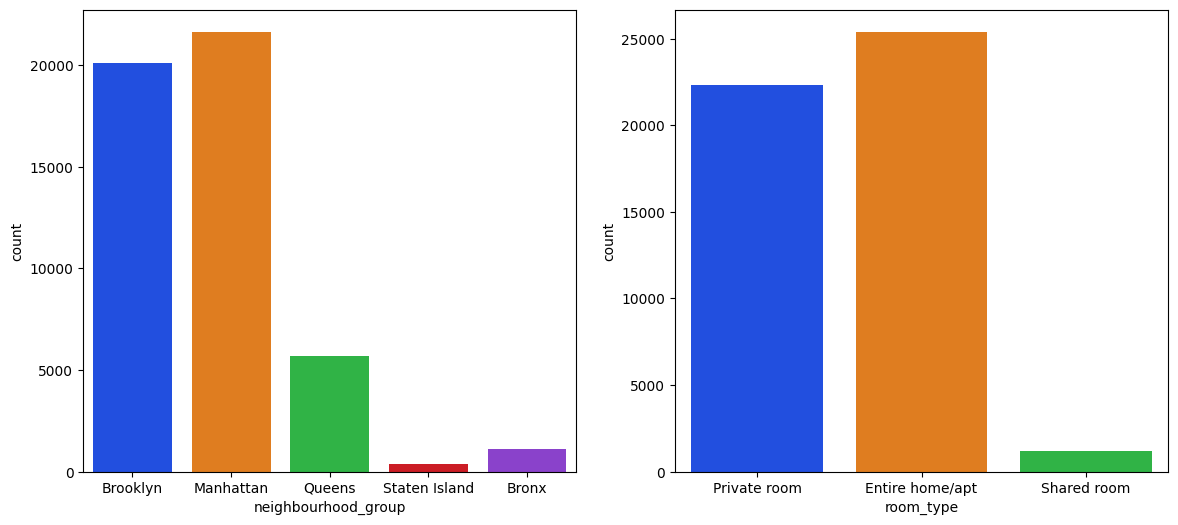

In [ ]:
# Ahora realizamos un grafico de barra 
import matplotlib.pyplot as plt
fig, axis = plt.subplots(1, 2, figsize = (14, 6))

sns.countplot(ax = axis[0], data = df, x = "neighbourhood_group", palette='bright', hue= "neighbourhood_group", legend=False)
sns.countplot(ax = axis[1], data = df, x = "room_type", palette='bright', hue= "room_type", legend=False)

plt.show()


In [ ]:
# En el grafico 1 podemos interpretar que hay una mayor rango de distribusion de anuncios de alquiler en la zona de manhattan y brooflyn que las otras 
# 3 barrios. 

# En el grafico 2 se ve que comparten pisos en comparacion a personas que tienen casa propia o piso propio y se observa una pequeña diferencia de personas
# que tienen piso propio a las que alquilan piso.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 3.7+ MB


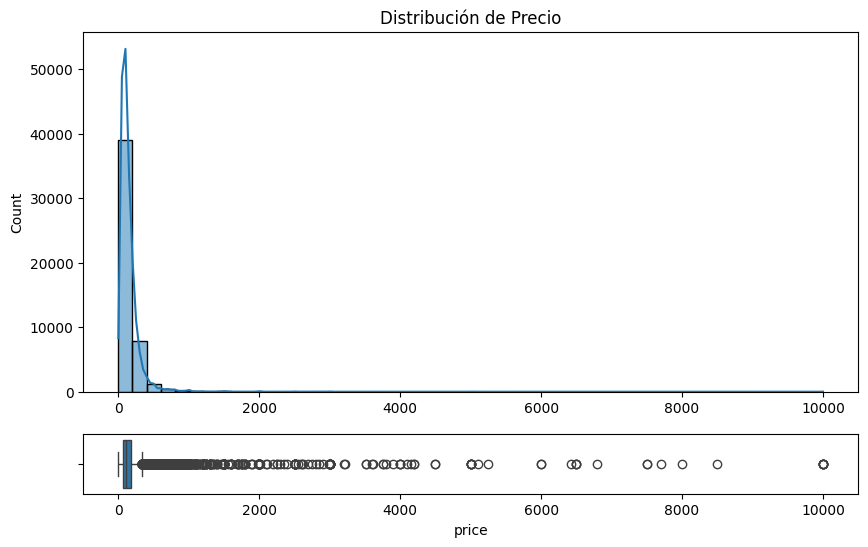

In [64]:
# -Análisis sobre variables numericas (histograma o diagramas de caja)


fig, axis = plt.subplots(2, 1, figsize = (10, 6), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax = axis[0], data = df, x = "price", bins=50, kde=True).set(title='Distribución de Precio', xlabel = None)
sns.boxplot(ax = axis[1], data = df, x = "price")


plt.show()





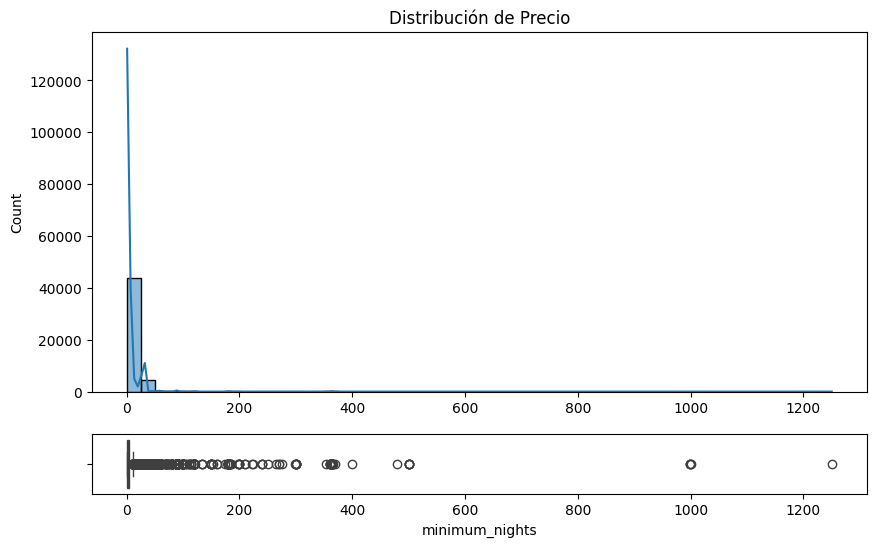

In [ ]:
fig, axis = plt.subplots(2, 1, figsize = (10, 6), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax = axis[0], data = df, x = "minimum_nights", bins=50, kde=True).set(title='Distribución por noche', xlabel = None)
sns.boxplot(ax = axis[1], data = df, x = "minimum_nights")


plt.show()


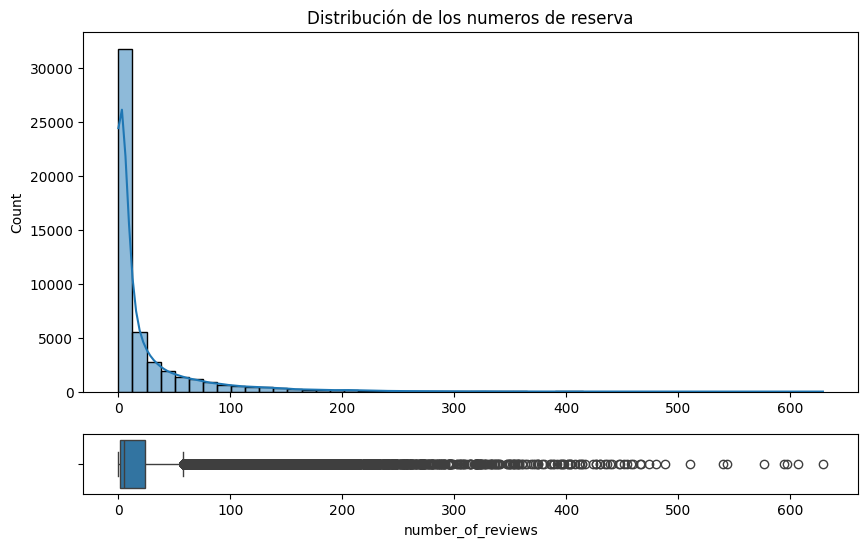

In [67]:
fig, axis = plt.subplots(2, 1, figsize = (10, 6), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax = axis[0], data = df, x = "number_of_reviews", bins=50, kde=True).set(title='Distribución de los numeros de reserva', xlabel = None)
sns.boxplot(ax = axis[1], data = df, x = "number_of_reviews")


plt.show()

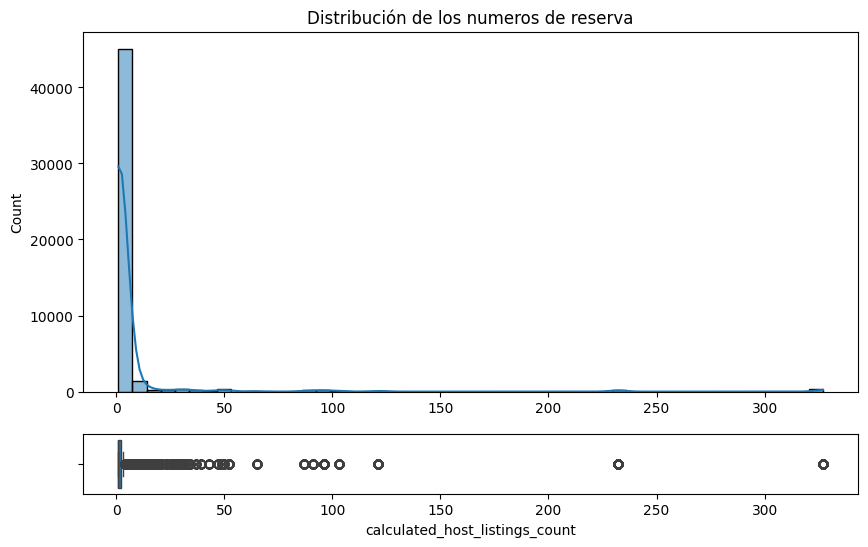

In [ ]:
fig, axis = plt.subplots(2, 1, figsize = (10, 6), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax = axis[0], data = df, x = "calculated_host_listings_count", bins=50, kde=True).set(title='Distribución de las reviews', xlabel = None)
sns.boxplot(ax = axis[1], data = df, x = "calculated_host_listings_count")


plt.show()

<Axes: xlabel='availability_365'>

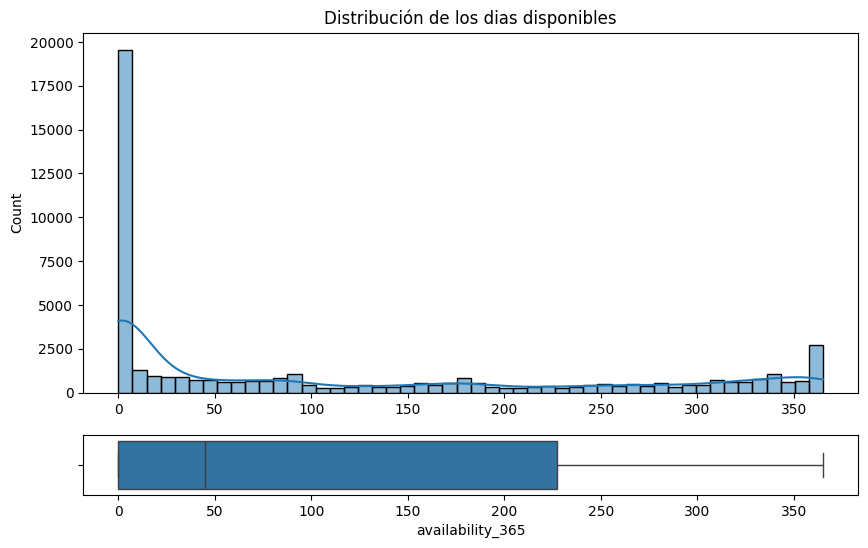

In [70]:
fig, axis = plt.subplots(2, 1, figsize = (10, 6), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax = axis[0], data = df, x = "availability_365", bins=50, kde=True).set(title='Distribución de los dias disponibles', xlabel = None)
sns.boxplot(ax = axis[1], data = df, x = "availability_365")


[Text(0.5, 1.0, 'Detección de Outliers en Latitud')]

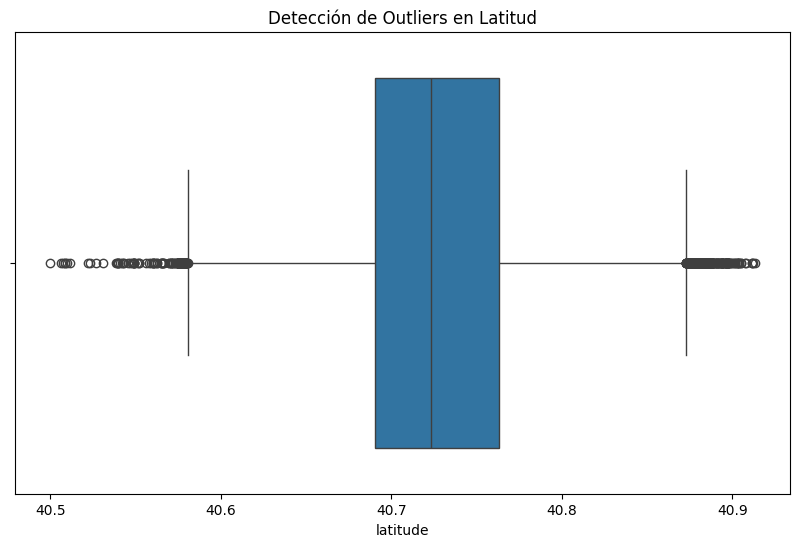

In [ ]:
# Analisis sobre variables float(con decimales)

# En este caso utilizaremos solo el grafico de boxplot

fig, axis = plt.subplots(1, 1, figsize = (10, 6))
sns.boxplot(ax = axis, data = df, x = "latitude").set(title='Ver outliers en Latitud')

[Text(0.5, 1.0, 'Ver outliers en Longitude')]

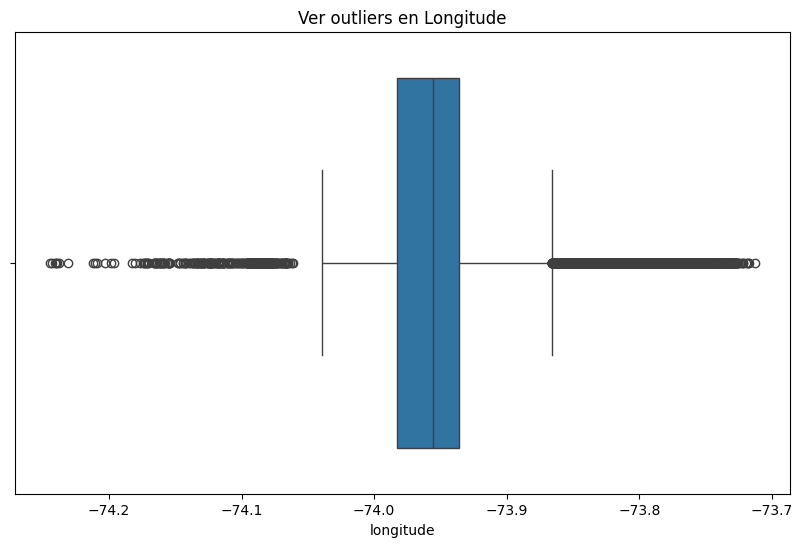

In [76]:
fig, axis = plt.subplots(1, 1, figsize = (10, 6))
sns.boxplot(ax = axis, data = df, x = "longitude").set(title='Ver outliers en Longitude')

C:\Users\ANTONIO\AppData\Local\Temp\ipykernel_5060\2189485790.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='neighbourhood_group', y='price', palette='viridis')


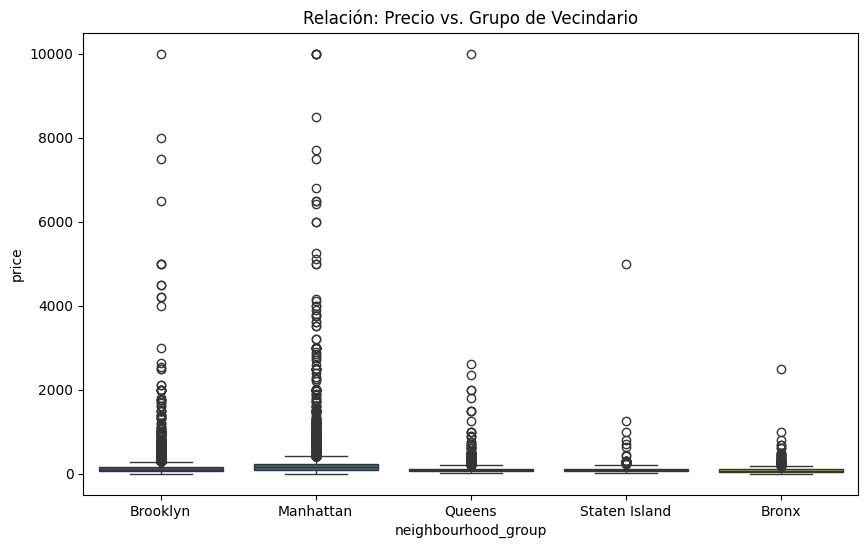

In [ ]:
# Paso 4 

# Análisis Multivariante (Relacionar las variables entre ellas)

# Nuestra variable a relacionar sera el precio y tenemos que relacionarlo con las categoricas y numericas para ver que relacion tienen con el fin de 
#darle mejores pistas a nuestro modelo 

# Correlacion multivariante categorica vs numerica 

#Precio - ( neighbourhood_group - room_type) - Diagrama de cajas 

# A - 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='neighbourhood_group', y='price', palette='viridis')
plt.title('Relación: neighbourhood_group vs. price')
plt.show()


C:\Users\ANTONIO\AppData\Local\Temp\ipykernel_5060\4257693757.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='room_type', y='price', palette='pastel')


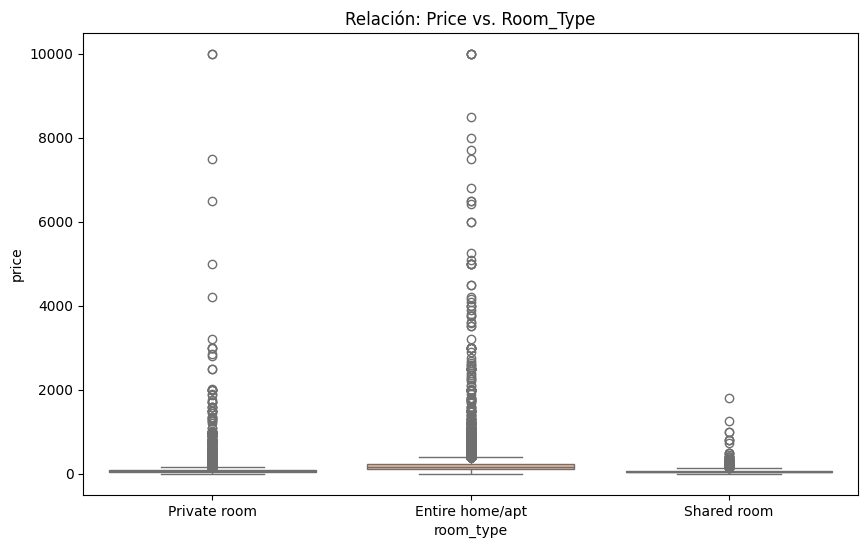

In [81]:
#B - 

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='room_type', y='price', palette='pastel')
plt.title('Relación: Price vs. Room_Type')
plt.show()

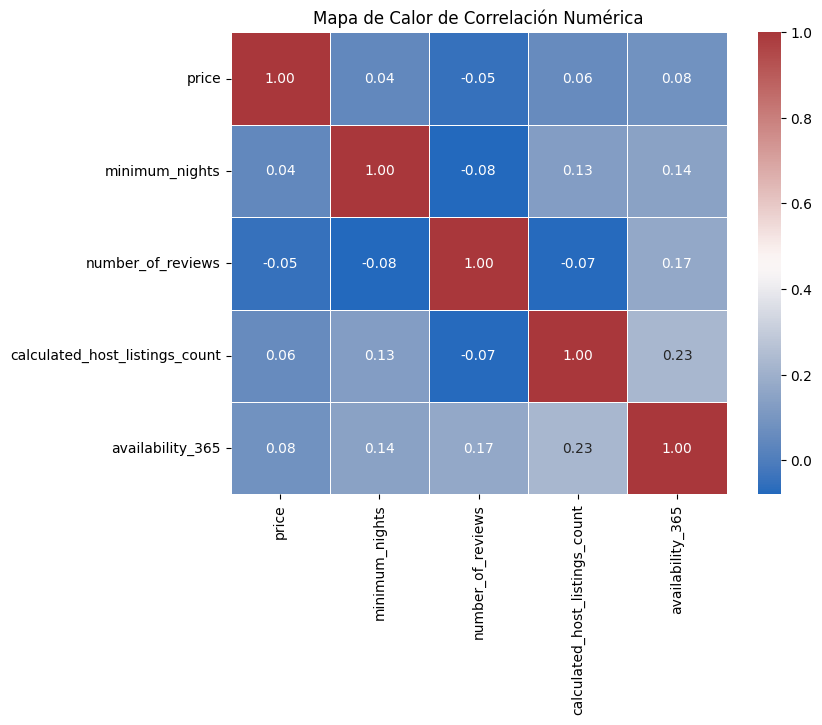

In [85]:
# Númerica vs Númerica , importnate hay que sacar la matriz de correlacion entre las variables antes de graficar con el objetivo de predecir 
 # Paso 1: Creo una lista donde voy a meter las variables a relacionar 

variables_relacion = ['price', 'minimum_nights', 'number_of_reviews', 
    'calculated_host_listings_count', 'availability_365']

#Paso 2: Hacemos la matriz de correlacion utilizando la funcion .corr()

matriz_correlacion = df[variables_relacion].corr()

#Paso 3: realizamos el mapa de calor que nos dira que relacion hay o no 

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True,fmt=".2f",cmap='vlag',linewidths=.5)
plt.title('Mapa de Calor de Correlación Numérica')
plt.show()


In [ ]:
# Paso 5 
# Ojo, recuerda : El Factor 1.5: Es un valor convencional establecido por el estadístico John Tukey.
# Nos permite ser lo suficientemente estrictos para atrapar los extremos, sin eliminar la mayoría de los datos.
# El 25% y el 75% son parte de una regla estadistica estandar para definir la normalidad de mis datos y por lo cual los ourliers 
# Eliminacion de valores Atípicos 

#- Limpieza de Price 

#Vamos a poner un parametro para definir la normalidad de mis datos 
Q1_precio = df['price'].quantile(0.25)
Q3_precio = df['price'].quantile(0.75)
IQR_precio = Q3_precio - Q1_precio

# Cualquier precio superior a este filtro se concidera un outiers y sera eliminado. 
limite_precio_superior = Q3_precio + 1.5 * IQR_precio
limite_precio_inferior = Q3_precio - + 1.5 * IQR_precio

print(round(limite_precio_superior, 2),round(limite_precio_inferior,2))

# Eliminiacion de Outliers: 

limpieza_df = df[df['price'] > limite_precio_superior ]
limpieza_df


334.0 16.0


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
61,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,1,180
85,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,1,7
103,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,2,243
114,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,4,298
121,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,2,216
...,...,...,...,...,...,...,...,...,...,...
48758,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,1,364
48833,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,1,64
48839,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,1,23
48842,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,1,9


In [100]:
# Eliminacion de outliers minimum_nights 

Q1_precio = df['minimum_nights'].quantile(0.25)
Q3_precio = df['minimum_nights'].quantile(0.75)
IQR_precio = Q3_precio - Q1_precio

# Cualquier precio superior a este filtro se concidera un outiers y sera eliminado. 
limite_precio_superior = Q3_precio + 1.5 * IQR_precio


print(round(limite_precio_superior, 2))

# Eliminiacion de Outliers: 

limpieza_df = df[df['minimum_nights'] < limite_precio_superior ]
limpieza_df

11.0


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


In [ ]:
# Paso 6
# Teniendo en cuenta que los datos sacados de airbnb no traen ningun NaN NO necesario hacer un manejo de valores faltantes 

In [101]:
#Paso 7
# Ingenieria de atributos 

# Debido a availability_365 con la finalidad de que le de al modelo respuestas mas simple por ejemplo si o no. 

df["disponible"] = (df["availability_365"] > 0).astype(int)
print(df["disponible"])

0        1
1        1
2        1
3        1
4        0
        ..
48890    1
48891    1
48892    1
48893    1
48894    1
Name: disponible, Length: 48895, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split
#Paso 8 

# Division de datos 
# Aqui una ves que ya temos el data set limpio ( lo que se pudo :)) y una columna nueva creada en la varibale de atributos llego la hora de dividir el
#modelo uno para que se entrene(trin) y otro para que se evaulue(split)

#Agrupamos todas las columnas menos el precio 
X = df.drop("price", axis = 1)
#Agrupamos todas las columnas menos el precio 
y = df["price"]

# Recuerda que el o.2 es el 20% que quermos utilizar para que aplique a la prueba 
# ramdom_ estate, nos garantiza que la aleatoriedad de la prueba sea la misma 
X_entreno, X_evalue, y_entreno, y_evalue = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_entreno.head()

NameError: name 'df' is not defined

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#Paso 9 


# Codificacion tenemos que pasar los datos a numeros para que el modelo los entienda ya que el no entiende de palabras. 
# En este caso vamos a utilizar la tenica one - hot encoding 
variables_cambiar = ["neighbourhood_group", "room_type"]


# instancio el encoder
onehot_encoder = OneHotEncoder(sparse_output=False)
#Aqui le estamos diciendo que aprenda con todos los datos de entrenamiento 
# entreno el encoder con los datos de entrenamiento
onehot_encoder.fit(X_entreno[variables_cambiar])

# En la primera parte de transforman las palabras a numeros que se aprendio en el .fit() y Le indicas que solo quieres transformar 
# las columnas que contienen palabras
X_matriz_de_numeros_cambiados = onehot_encoder.transform(X_entreno[variables_cambiar])

X_convertir_objetos_en_pandas = pd.DataFrame(X_matriz_de_numeros_cambiados, index = X_entreno.index, columns=onehot_encoder.get_feature_names_out(variables_cambiar))
# Tomamos la matriz de numeros obtenidos arriba y la covertimos en un obejo de pandas
#pd.DataFrame()

# dentro del paretesis le digo que a la nueva tabla le agrege las mims
#filas que tenia dentro del dataframe original 
# X_matriz_de_numeros_cambiados, index = X_entreno.index

# y por ultimo coloca los nombres correctosa las nuevas colummnas 
# columns=onehot_encoder.get_feature_names_out(variables_cambiar)


X_convertir_objetos_en_pandas.head()

NameError: name 'X_entreno' is not defined

In [17]:
#Paso 9 

from sklearn.preprocessing import StandardScaler

#Escalado 

#El metodo de escalado a utilizar es StandarScaler ya que es el que mas se adapta a mi modelo. 

variables_a_escalar = ["latitude", "longitude", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365"]

# instancio el escalador
scaler = StandardScaler()

# Aprende las reglas de  media y la desviacion usando los datos de x_entreno
scaler.fit(X_entreno[variables_cambiar])

# Aplica las reglas de la media y la desviacion que aprendio anteriormente y las aplica x_entreno para escalarlos.
X_escalado_entreno = scaler.transform(X_entreno[variables_a_escalar])
#Remplazamos las columnas nuevas por las viejas 
X_panda_escalado_entreno = pd.DataFrame(X_escalado_entreno, index = X_entreno.index, columns = variables_a_escalar)

X_evalue_entreno_escalado = scaler.transform(X_evalue[variables_a_escalar])
X_evalue_escalado_entreno = pd.DataFrame(X_evalue_entreno_escalado, index = X_evalue.index, columns = variables_a_escalar)

X_panda_escalado_entreno.head()


NameError: name 'X_entreno' is not defined